# QuTiP lecture: Single-Atom-Lasing

Author: J. R. Johansson (robert@riken.jp), http://dml.riken.jp/~rob/

The latest version of this [IPython notebook](http://ipython.org/ipython-doc/dev/interactive/htmlnotebook.html) lecture is available at [http://github.com/jrjohansson/qutip-lectures](http://github.com/jrjohansson/qutip-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.com](http://jrjohansson.github.com).

In [30]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

from IPython.display import Image

# Introduction and model

Consider a single atom coupled to a single cavity mode, as illustrated in the figure below. If there atom excitation rate $\Gamma$ exceeds the relaxation rate, a population inversion can occur in the atom, and if coupled to the cavity the atom can then act as a photon pump on the cavity.

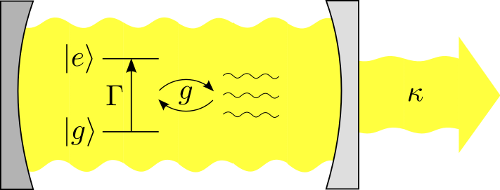

In [3]:
Image(filename='images/schematic-lasing-model.png')

The coherent dynamics in this model is described by the Hamiltonian

$H = \hbar \omega_0 a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g\sigma_x(a^\dagger + a)$

where $\omega_0$ is the cavity energy splitting, $\omega_a$ is the atom energy splitting and $g$ is the atom-cavity interaction strength.

In addition to the coherent dynamics the following incoherent processes are also present: 

1. $\kappa$ relaxation and thermal excitations of the cavity, 
2. $\Gamma$ atomic excitation rate (pumping process).

The Lindblad master equation for the model is:

$\frac{d}{dt}\rho = -i[H, \rho] + \Gamma\left(\sigma_+\rho\sigma_- - \frac{1}{2}\sigma_-\sigma_+\rho - \frac{1}{2}\rho\sigma_-\sigma_+\right)
+ \kappa (1 + n_{\rm th}) \left(a\rho a^\dagger - \frac{1}{2}a^\dagger a\rho - \frac{1}{2}\rho a^\dagger a\right)
+ \kappa n_{\rm th} \left(a^\dagger\rho a - \frac{1}{2}a a^\dagger \rho - \frac{1}{2}\rho a a^\dagger\right)$

in units where $\hbar = 1$.

References:

 * [Yi Mu, C.M. Savage, Phys. Rev. A 46, 5944 (1992)](http://dx.doi.org/10.1103/PhysRevA.46.5944)

 * [D.A. Rodrigues, J. Imbers, A.D. Armour, Phys. Rev. Lett. 98, 067204 (2007)](http://dx.doi.org/10.1103/PhysRevLett.98.067204)

 * [S. Ashhab, J.R. Johansson, A.M. Zagoskin, F. Nori, New J. Phys. 11, 023030 (2009)](http://dx.doi.org/10.1088/1367-2630/11/2/023030)

### Problem parameters

In [26]:
w0 = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.01  # coupling strength

kappa = 0.01        # cavity dissipation rate
gamma = 0.01        # atom dissipation rate
Gamma = 0.096        # atom pump rate

N = 50              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation

tlist = np.linspace(0, 150, 101)

### Setup the operators, the Hamiltonian and initial state

In [27]:
# intial state
psi0 = tensor(basis(N,0), basis(2,0)) # start without excitations

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
sx = tensor(qeye(N), sigmax())

# Hamiltonian
H = w0 * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * sx

In [28]:
H

Quantum object: dims = [[50, 2], [50, 2]], shape = [100, 100], type = oper, isherm = True
Qobj data =
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   6.28318531e+00   1.00000000e-02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e-02   6.28318531e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   3.07876080e+02
    7.00000000e-02   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   7.00000000e-02
    3.07876080e+02   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   3.14159265e+02]]

### Create a list of collapse operators that describe the dissipation

In [31]:
# collapse operators
c_ops = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

rate = Gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm.dag())

### Evolve the system

Here we evolve the system with the Lindblad master equation solver, and we request that the expectation values of the operators $a^\dagger a$ and $\sigma_+\sigma_-$ are returned by the solver by passing the list `[a.dag()*a, sm.dag()*sm]` as the fifth argument to the solver.

In [32]:
opt = Odeoptions(nsteps=2000) # allow extra time-steps 
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm], options=opt)

Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

## Visualize the results

Here we plot the excitation probabilities of the cavity and the atom (these expectation values were calculated by the `mesolve` above).

In [ ]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(8,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.set_xlim(0, 150)
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability');

## Steady state: cavity fock-state distribution and wigner function

In [11]:
rho_ss = steadystate(H, c_ops)

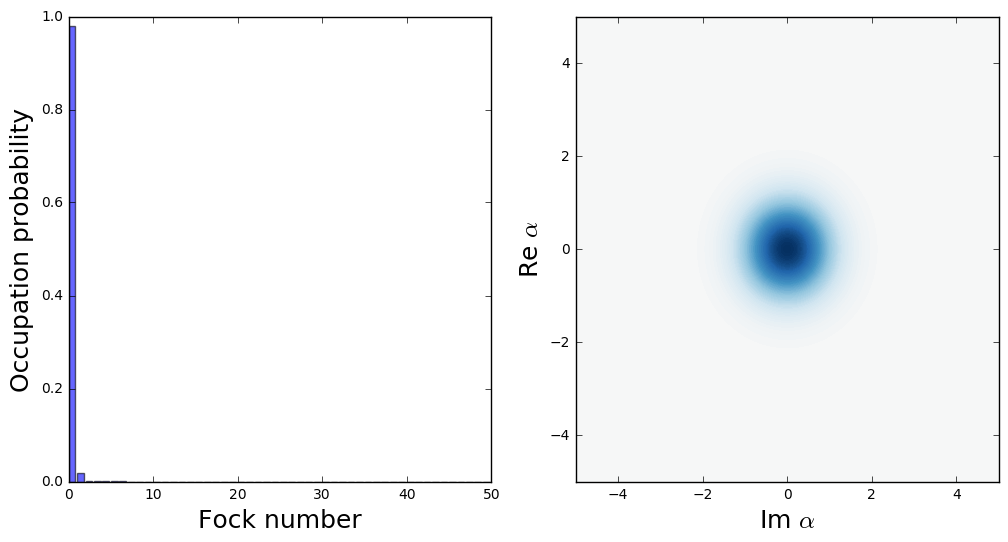

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

xvec = np.linspace(-5,5,200)

rho_cavity = ptrace(rho_ss, 0)
W = wigner(rho_cavity, xvec, xvec)
wlim = abs(W).max()

axes[1].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=plt.get_cmap('RdBu'))
axes[1].set_xlabel(r'Im $\alpha$', fontsize=18)
axes[1].set_ylabel(r'Re $\alpha$', fontsize=18)

axes[0].bar(np.arange(0, N), np.real(rho_cavity.diag()), color="blue", alpha=0.6)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, N)
axes[0].set_xlabel('Fock number', fontsize=18)
axes[0].set_ylabel('Occupation probability', fontsize=18);

## Cavity fock-state distribution and Wigner function as a function of time

In [33]:
tlist = np.linspace(0, 25, 5)
output = mesolve(H, psi0, tlist, c_ops, [], options=Odeoptions(nsteps=10000))

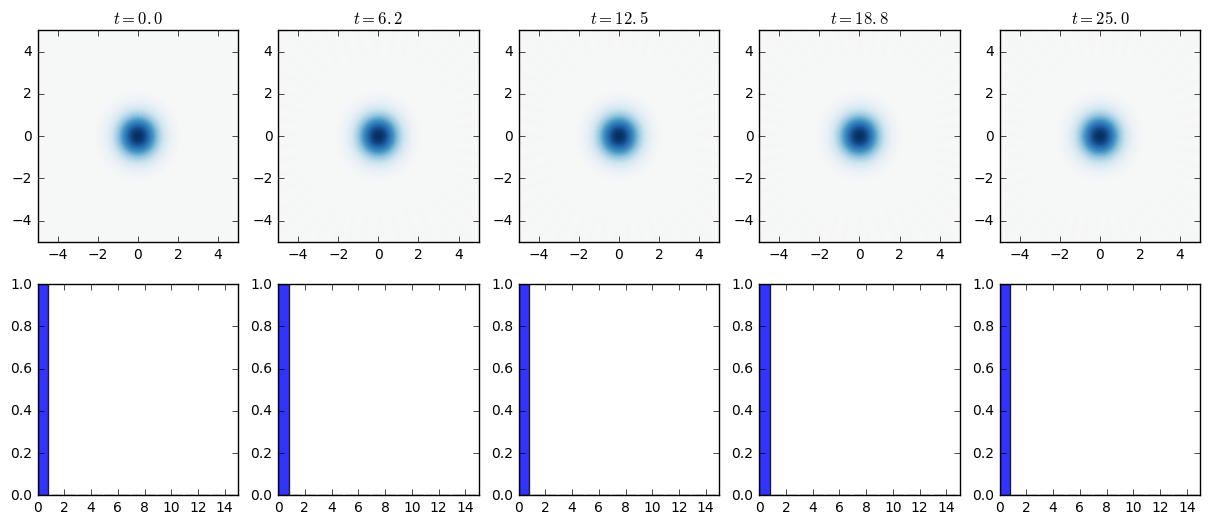

In [20]:
rho_ss_sublist = output.states

xvec = np.linspace(-5,5,200)

fig, axes = plt.subplots(2, len(rho_ss_sublist), figsize=(3*len(rho_ss_sublist), 6))

for idx, rho_ss in enumerate(rho_ss_sublist):

    # trace out the cavity density matrix
    rho_ss_cavity = ptrace(rho_ss, 0)
    
    # calculate its wigner function
    W = wigner(rho_ss_cavity, xvec, xvec)
    
    # plot its wigner function
    wlim = abs(W).max()
    axes[0,idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=plt.get_cmap('RdBu'))
    axes[0,idx].set_title(r'$t = %.1f$' % tlist[idx])
    
    # plot its fock-state distribution
    axes[1,idx].bar(np.arange(0, N), np.real(rho_ss_cavity.diag()), color="blue", alpha=0.8)
    axes[1,idx].set_ylim(0, 1)
    axes[1,idx].set_xlim(0, 15)

## Steady state average photon occupation in cavity as a function of pump rate

References:

 * [S. Ashhab, J.R. Johansson, A.M. Zagoskin, F. Nori, New J. Phys. 11, 023030 (2009)](http://dx.doi.org/10.1088/1367-2630/11/2/023030)

In [34]:
def calulcate_avg_photons(N, Gamma):
       
    # collapse operators
    c_ops = []

    rate = kappa * (1 + n_th_a)
    if rate > 0.0:
        c_ops.append(np.sqrt(rate) * a)

    rate = kappa * n_th_a
    if rate > 0.0:
        c_ops.append(np.sqrt(rate) * a.dag())

    rate = gamma
    if rate > 0.0:
        c_ops.append(np.sqrt(rate) * sm)

    rate = Gamma
    if rate > 0.0:
        c_ops.append(np.sqrt(rate) * sm.dag())
      
    # Ground state and steady state for the Hamiltonian: H = H0 + g * H1
    rho_ss = steadystate(H, c_ops)
    
    # cavity photon number
    n_cavity = expect(a.dag() * a, rho_ss)
    
    # cavity second order coherence function
    g2_cavity = expect(a.dag() * a.dag() * a * a, rho_ss) / (n_cavity ** 2)

    return n_cavity, g2_cavity

In [35]:
Gamma_max = 2 * (4*g**2) / kappa
Gamma_vec = np.linspace(0.1, Gamma_max, 50)

n_avg_vec = []
g2_vec = []

for Gamma in Gamma_vec:
    n_avg, g2 = calulcate_avg_photons(N, Gamma)
    n_avg_vec.append(n_avg)
    g2_vec.append(g2)

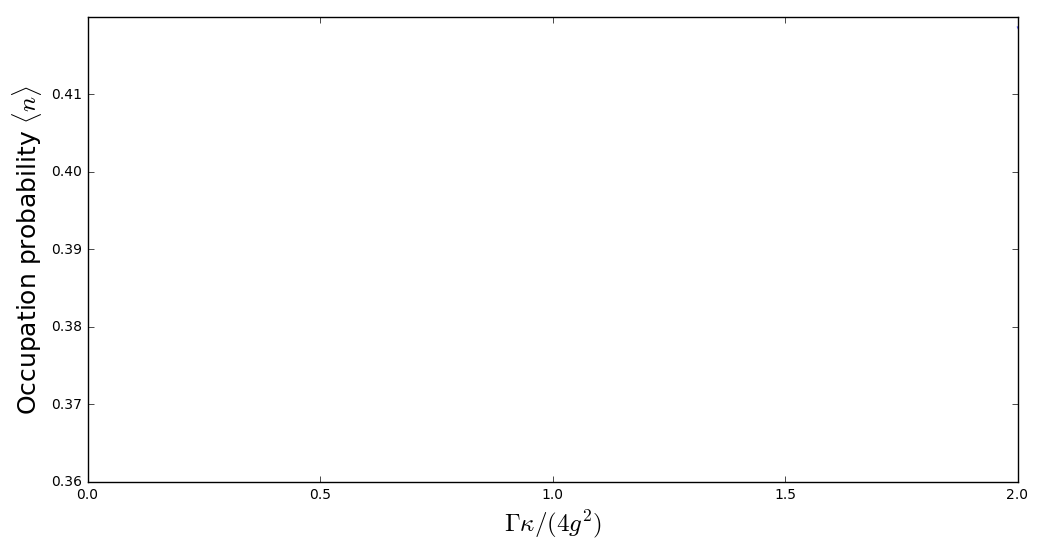

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))

axes.plot(Gamma_vec * kappa / (4*g**2), n_avg_vec, color="blue", alpha=0.6, label="numerical")

axes.set_xlabel(r'$\Gamma\kappa/(4g^2)$', fontsize=18)
axes.set_ylabel(r'Occupation probability $\langle n \rangle$', fontsize=18)
axes.set_xlim(0, 2);

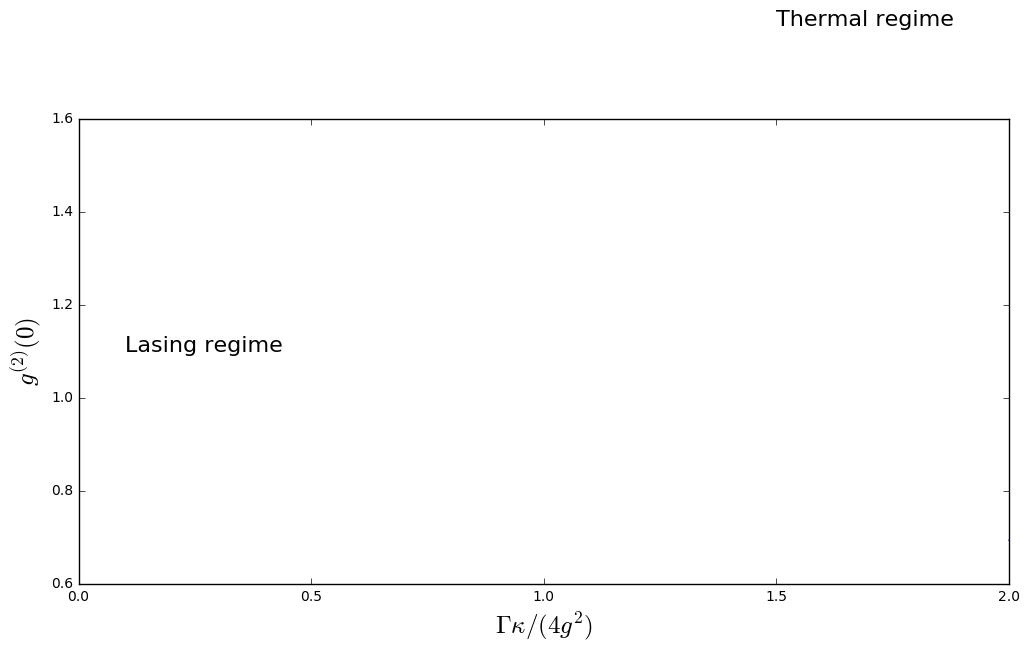

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))

axes.plot(Gamma_vec * kappa / (4*g**2), g2_vec, color="blue", alpha=0.6, label="numerical")

axes.set_xlabel(r'$\Gamma\kappa/(4g^2)$', fontsize=18)
axes.set_ylabel(r'$g^{(2)}(0)$', fontsize=18)
axes.set_xlim(0, 2)
axes.text(0.1, 1.1, "Lasing regime", fontsize=16)
axes.text(1.5, 1.8, "Thermal regime", fontsize=16);

Here we see that lasing is suppressed for $\Gamma\kappa/(4g^2) > 1$. 


Let's look at the fock-state distribution at $\Gamma\kappa/(4g^2) = 0.5$  (lasing regime) and $\Gamma\kappa/(4g^2) = 1.5$ (suppressed regime):

### Case 1: $\Gamma\kappa/(4g^2) = 0.5$

In [20]:
Gamma = 0.5 * (4*g**2) / kappa

In [21]:
c_ops = [np.sqrt(kappa * (1 + n_th_a)) * a, np.sqrt(kappa * n_th_a) * a.dag(), np.sqrt(gamma) * sm, np.sqrt(Gamma) * sm.dag()]

rho_ss = steadystate(H, c_ops)

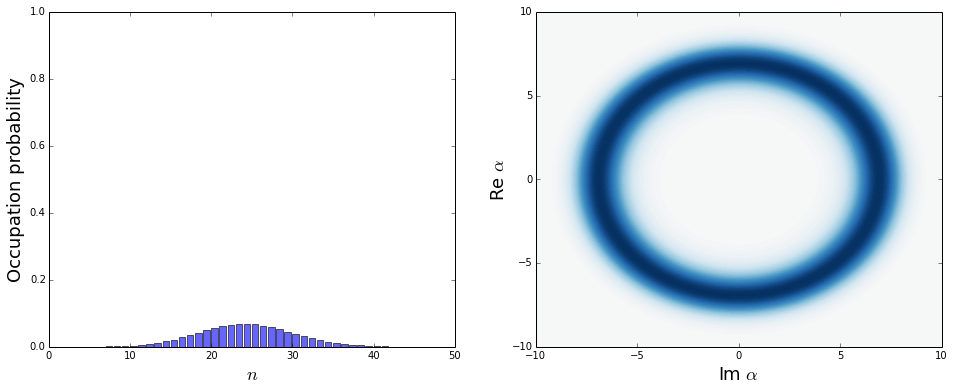

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

xvec = np.linspace(-10,10,200)

rho_cavity = ptrace(rho_ss, 0)
W = wigner(rho_cavity, xvec, xvec)
wlim = abs(W).max()
axes[1].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=plt.get_cmap('RdBu'))
axes[1].set_xlabel(r'Im $\alpha$', fontsize=18)
axes[1].set_ylabel(r'Re $\alpha$', fontsize=18)

axes[0].bar(arange(0, N), real(rho_cavity.diag()), color="blue", alpha=0.6)
axes[0].set_xlabel(r'$n$', fontsize=18)
axes[0].set_ylabel(r'Occupation probability', fontsize=18)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, N);

### Case 2: $\Gamma\kappa/(4g^2) = 1.5$

In [23]:
Gamma = 1.5 * (4*g**2) / kappa

In [24]:
c_ops = [np.sqrt(kappa * (1 + n_th_a)) * a, np.sqrt(kappa * n_th_a) * a.dag(), np.sqrt(gamma) * sm, np.sqrt(Gamma) * sm.dag()]

rho_ss = steadystate(H, c_ops)

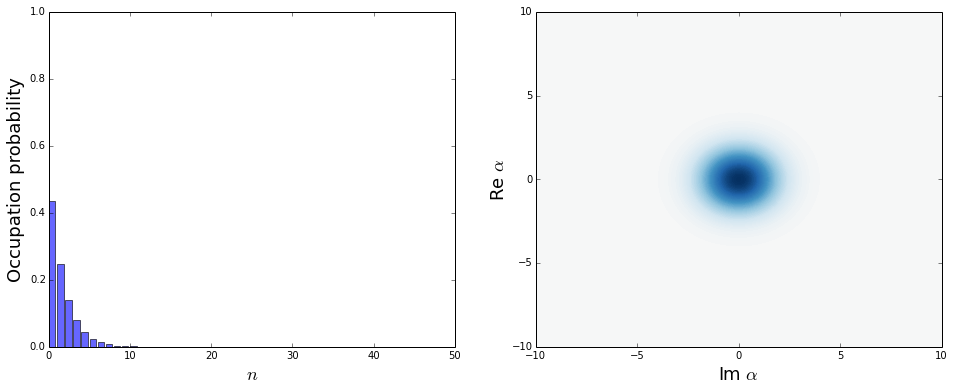

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

xvec = np.linspace(-10,10,200)

rho_cavity = ptrace(rho_ss, 0)
W = wigner(rho_cavity, xvec, xvec)
wlim = abs(W).max()
axes[1].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=plt.get_cmap('RdBu'))
axes[1].set_xlabel(r'Im $\alpha$', fontsize=18)
axes[1].set_ylabel(r'Re $\alpha$', fontsize=18)

axes[0].bar(arange(0, N), real(rho_cavity.diag()), color="blue", alpha=0.6)
axes[0].set_xlabel(r'$n$', fontsize=18)
axes[0].set_ylabel(r'Occupation probability', fontsize=18)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, N);

Too large pumping rate $\Gamma$ kills the lasing process: reversed threshold.

### Software version

In [27]:
from qutip.ipynbtools import version_table

version_table()